In [13]:
import pandas as pd
import altair as alt
import re

# Carregar o CSV com os dados
df = pd.read_csv('logs_coletados2.csv')

# Função para extrair a data da URL
def extrair_data_viagem(url):
    # Usamos uma expressão regular para extrair a data no formato YYYY-MM-DD
    match = re.search(r'(\d{4}-\d{2}-\d{2})', url)
    if match:
        return match.group(0)
    return None

# Aplicar a função para criar uma nova coluna com a data de viagem
df['data_viagem'] = df['url'].apply(extrair_data_viagem)

# Garantir que a nova coluna seja do tipo datetime
df['data_viagem'] = pd.to_datetime(df['data_viagem'])

# Garantir que o timestamp seja tratado como datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Separar os destinos de ida e volta
destinos_ida = ['FLN-MAD', 'FLN-AMS', 'FLN-LIS', 'FLN-OPO', 'FLN-ROM']
destinos_volta = ['MAD-FLN', 'AMS-FLN', 'LIS-FLN', 'OPO-FLN', 'ROM-FLN']

# Filtrar os dados de ida
df_ida = df[df['destination'].isin(destinos_ida)]

# Filtrar os dados de volta
df_volta = df[df['destination'].isin(destinos_volta)]

# Criar gráfico interativo para os destinos de ida usando Altair
chart_ida = alt.Chart(df_ida).mark_line().encode(
    x=('hoursminutes(timestamp):O'),
    #x='timestamp:T',
    y='price:Q',
    color='destination:N',
    tooltip=['data_viagem:T', 'price:Q', 'destination:N', 'timestamp:T']
).properties(
    title='Variação de Preço ao Longo do Tempo para Destinos de Ida'
).interactive()

# Criar gráfico interativo para os destinos de volta usando Altair
chart_volta = alt.Chart(df_volta).mark_line().encode(
    x=('hoursminutes(timestamp):O'),
    y='price:Q',
    color='destination:N',
    tooltip=['data_viagem:T', 'price:Q', 'destination:N', 'timestamp:T']
).properties(
    title='Variação de Preço ao Longo do Tempo para Destinos de Volta'
).interactive()

# Exibir os gráficos
chart_ida.show()
chart_volta.show()


alt.Chart(...)

alt.Chart(...)

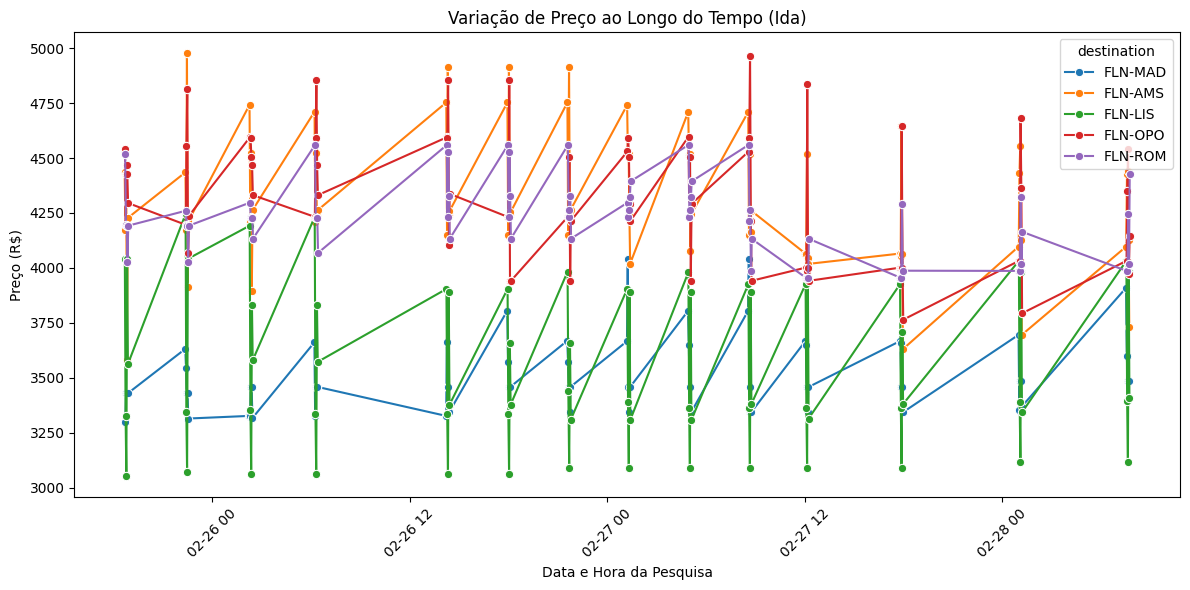

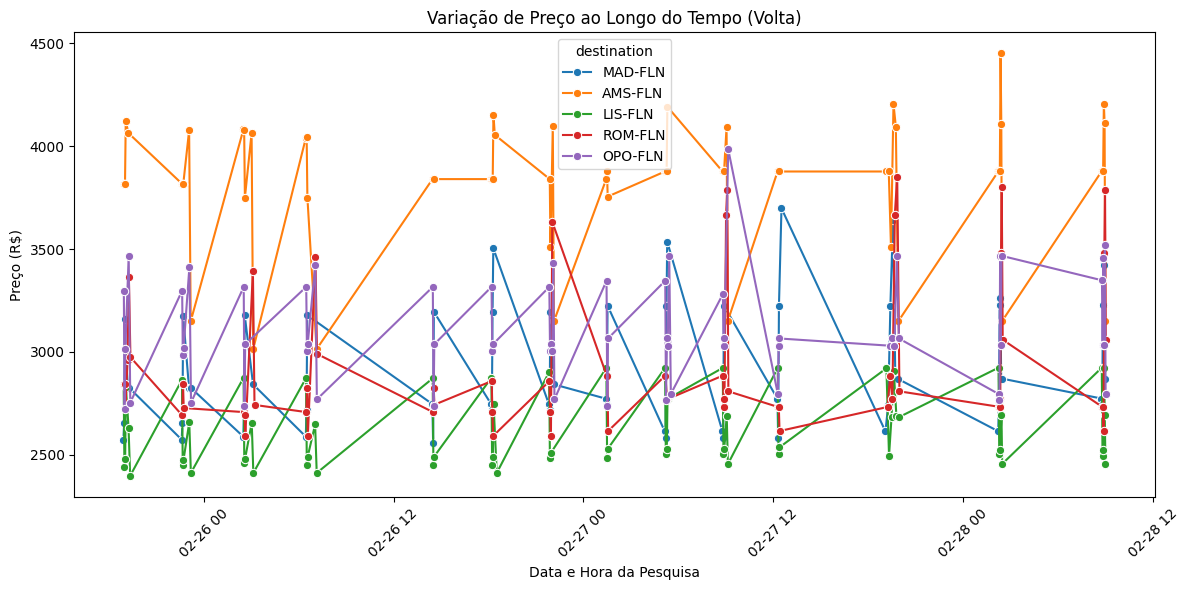

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o CSV com os dados
df = pd.read_csv('logs_coletados.csv')

# Garantir que o timestamp seja tratado como datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filtrar os destinos de ida (ex: FLN-MAD, FLN-AMS, ...)
destinos_ida = ["FLN-MAD", "FLN-AMS", "FLN-LIS", "FLN-OPO", "FLN-ROM"]
df_ida = df[df['destination'].isin(destinos_ida)]

# Filtrar os destinos de volta (ex: MAD-FLN, AMS-FLN, ...)
destinos_volta = ["MAD-FLN", "AMS-FLN", "LIS-FLN", "OPO-FLN", "ROM-FLN"]
df_volta = df[df['destination'].isin(destinos_volta)]

# Gráfico para ida
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='price', hue='destination', data=df_ida, marker='o')
plt.title('Variação de Preço ao Longo do Tempo (Ida)')
plt.xlabel('Data e Hora da Pesquisa')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico para volta
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='price', hue='destination', data=df_volta, marker='o')
plt.title('Variação de Preço ao Longo do Tempo (Volta)')
plt.xlabel('Data e Hora da Pesquisa')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
